In [8]:
import ils.cfsdp as cfs
import ils.utils as ut
from sklearn.metrics.pairwise import pairwise_distances
import time
import warnings
warnings.filterwarnings("ignore")

In [2]:
X = ut.synthetic_data()
X[0]

,x,y
ID,,
0,-1.227525,0.090845
1,0.548876,-1.044260
2,-1.328989,-0.547856
3,-1.487186,-0.403210
4,-1.366567,-0.985848
...,...,...
1495,-1.243087,-0.068812
1496,-0.063553,-1.098251
1497,0.738553,0.963821


In [11]:
def test_cfsdp(data, k):
    distance_matrix = pairwise_distances(data)
    dc, dc_value_list, field = cfs.choose_dc(distance_matrix)
    dc = cfs.calculate_dc(distance_matrix, dc)
    print(dc)
    density = cfs.continuous_density(distance_matrix, dc)
    delta_matrix, closest_point = cfs.delta_function(distance_matrix, density) 
    cfs.density_delta(density, delta_matrix, data)
    # A hint for choosing the number of centers is provided by the plot of yi sorted in decreasing order
    scores = cfs.choosing_centernumber(density, delta_matrix)
    index = cfs.top_k_idx(scores, k)
    cfs.applyILS(data, data, index, ut.colors)
    return scores, index

In [9]:
def pre_calculate(data):
    start = time.time()
    distance_matrix = pairwise_distances(data)
    dc, dc_value_list, field = cfs.choose_dc(distance_matrix)
    print(dc)
    density = cfs.continuous_density(distance_matrix, dc)
    delta_matrix, closest_point = cfs.delta_function(distance_matrix, density) 
    scores = cfs.choosing_centernumber(density, delta_matrix)
    end = time.time()
    print('Density caluation time {}'.format(end-start))
    return scores, density, delta_matrix

In [ ]:
def combine_clustering(data, scores, k):
    start = time.time()
    index = cfs.top_k_idx(scores, k)
    newL, count = cfs.applyILS(data, data, index, ut.colors)
    end = time.time()
    print('Label Spreading time {}'.format(end-start))
    return newL, count

0.08570991287109667


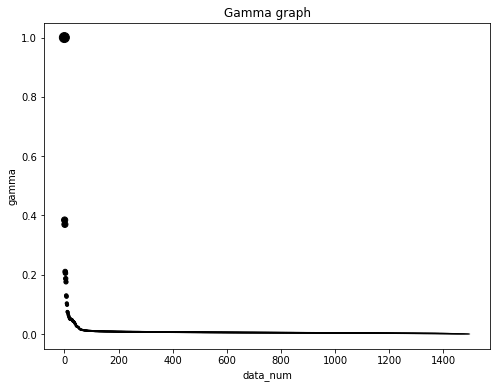

Density caluation time 3.156017780303955


In [10]:
scores, density, delta_matrix = pre_calculate(X[0])

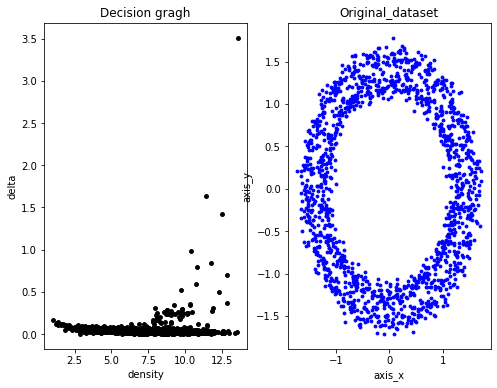

In [12]:
cfs.density_delta(density, delta_matrix, X[0])

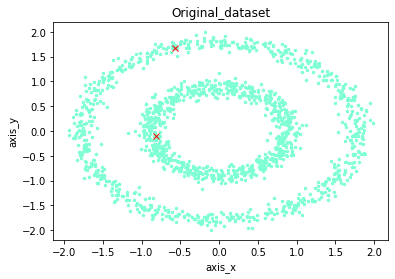

In [22]:
cfs.plot_centroid(X[0], index)

0.024503591815812062


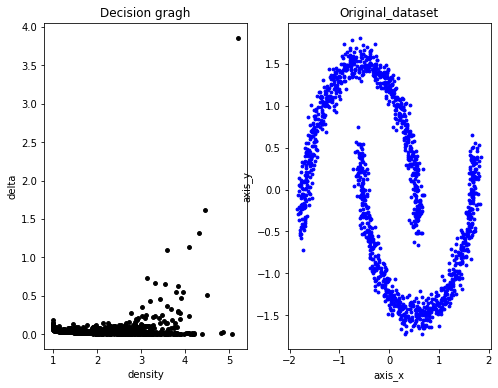

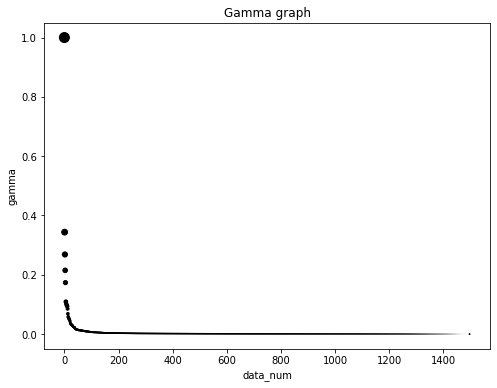

[1.0, 0.3437582493818915]
3
The number of clusters: 2


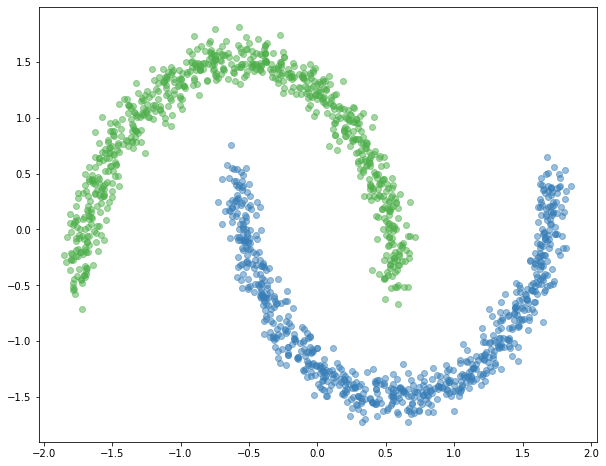

(array([0.00051552, 0.00049472, 0.00058364, ..., 0.00143993, 0.00178173,
        0.00192469]),
 array([1288,  910]))

In [6]:
test_cfsdp(X[1],2)

0.025779492855403843


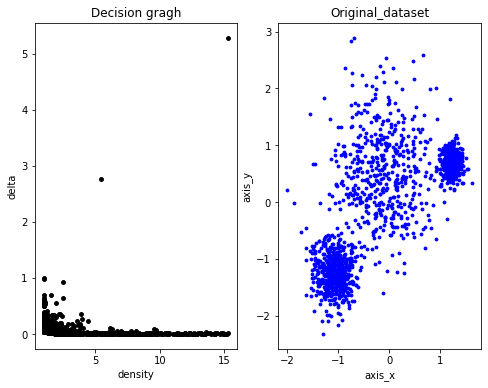

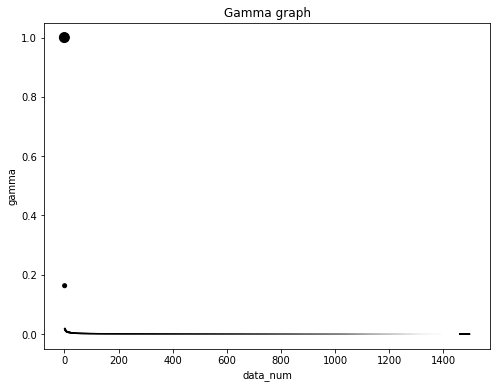

[1.0, 0.16309524568928896, 0.017789172347364858]
4
The number of clusters: 3


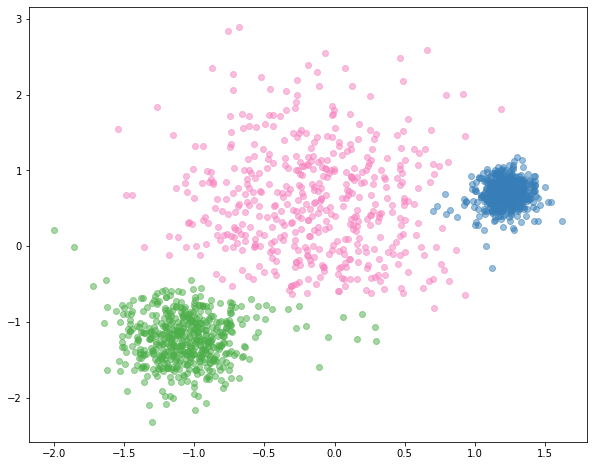

(array([4.54613589e-08, 3.29649375e-09, 2.97030795e-15, ...,
        7.24080744e-04, 2.00340701e-04, 8.19553982e-04]),
 array([612, 769, 672]))

In [7]:
test_cfsdp(X[2],3)

0.03157298688374564


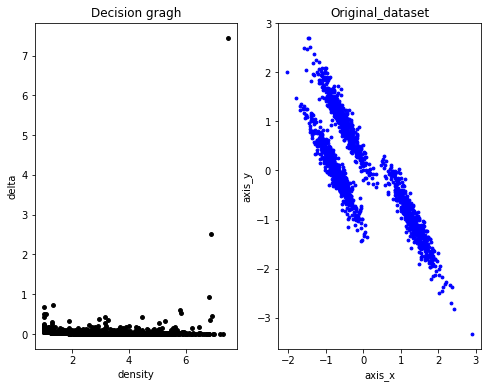

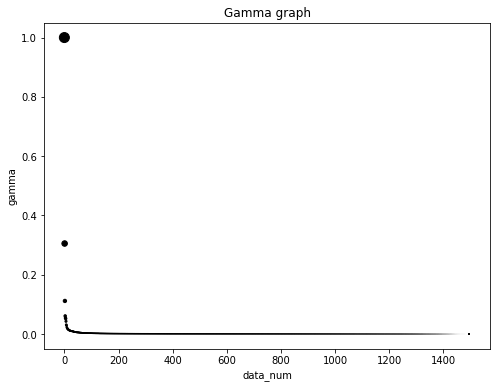

[1.0, 0.3053704421203181, 0.11172888271476085]
4
The number of clusters: 3


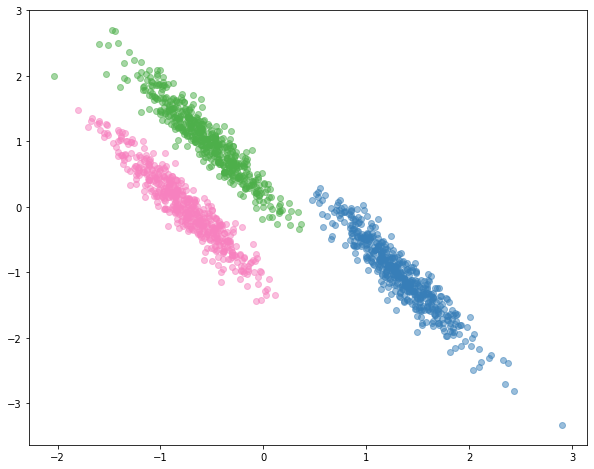

(array([9.07375551e-04, 2.61519330e-04, 2.48602274e-07, ...,
        5.79811139e-04, 4.45879111e-05, 4.97586166e-04]),
 array([ 954, 1490,  942]))

In [8]:
test_cfsdp(X[3],3)

0.014915799987586966


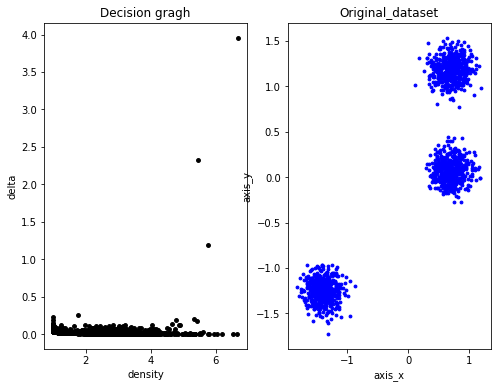

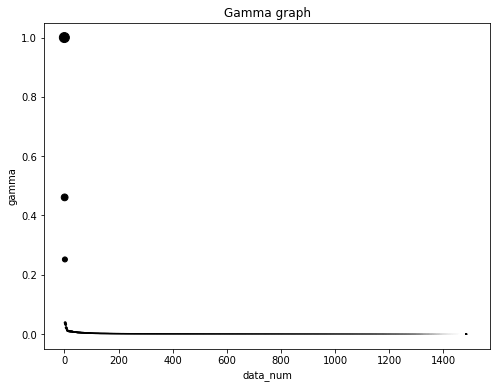

[1.0, 0.46097842571187514, 0.2516764738541398]
4
The number of clusters: 3


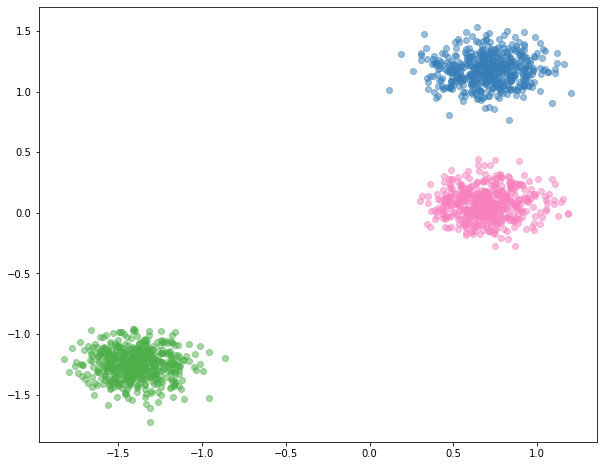

(array([2.91229648e-04, 3.20364003e-04, 1.05920921e-03, ...,
        3.54489278e-04, 3.45156504e-04, 8.60484883e-06]),
 array([ 303,  349, 1432]))

In [9]:
test_cfsdp(X[4],3)